In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Balanced exe (binary first fail)

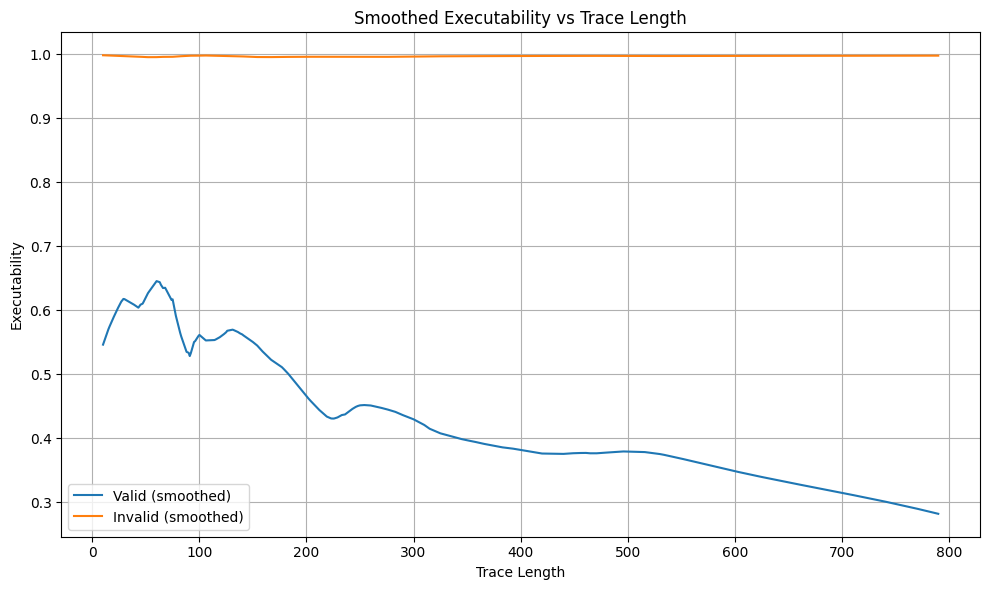

In [19]:


# Read and clean
df = pd.read_csv('balanced_binary_exe.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='len')

# Apply LOWESS
valid_smoothed = lowess(df['valid_exe'], df['len'], frac=0.3)
invalid_smoothed = lowess(df['invalid_exe'], df['len'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(valid_smoothed[:, 0], valid_smoothed[:, 1], label='Valid (smoothed)')
plt.plot(invalid_smoothed[:, 0], invalid_smoothed[:, 1], label='Invalid (smoothed)')
plt.xlabel("Trace Length")
plt.ylabel("Executability")
plt.title("Smoothed Executability vs Trace Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


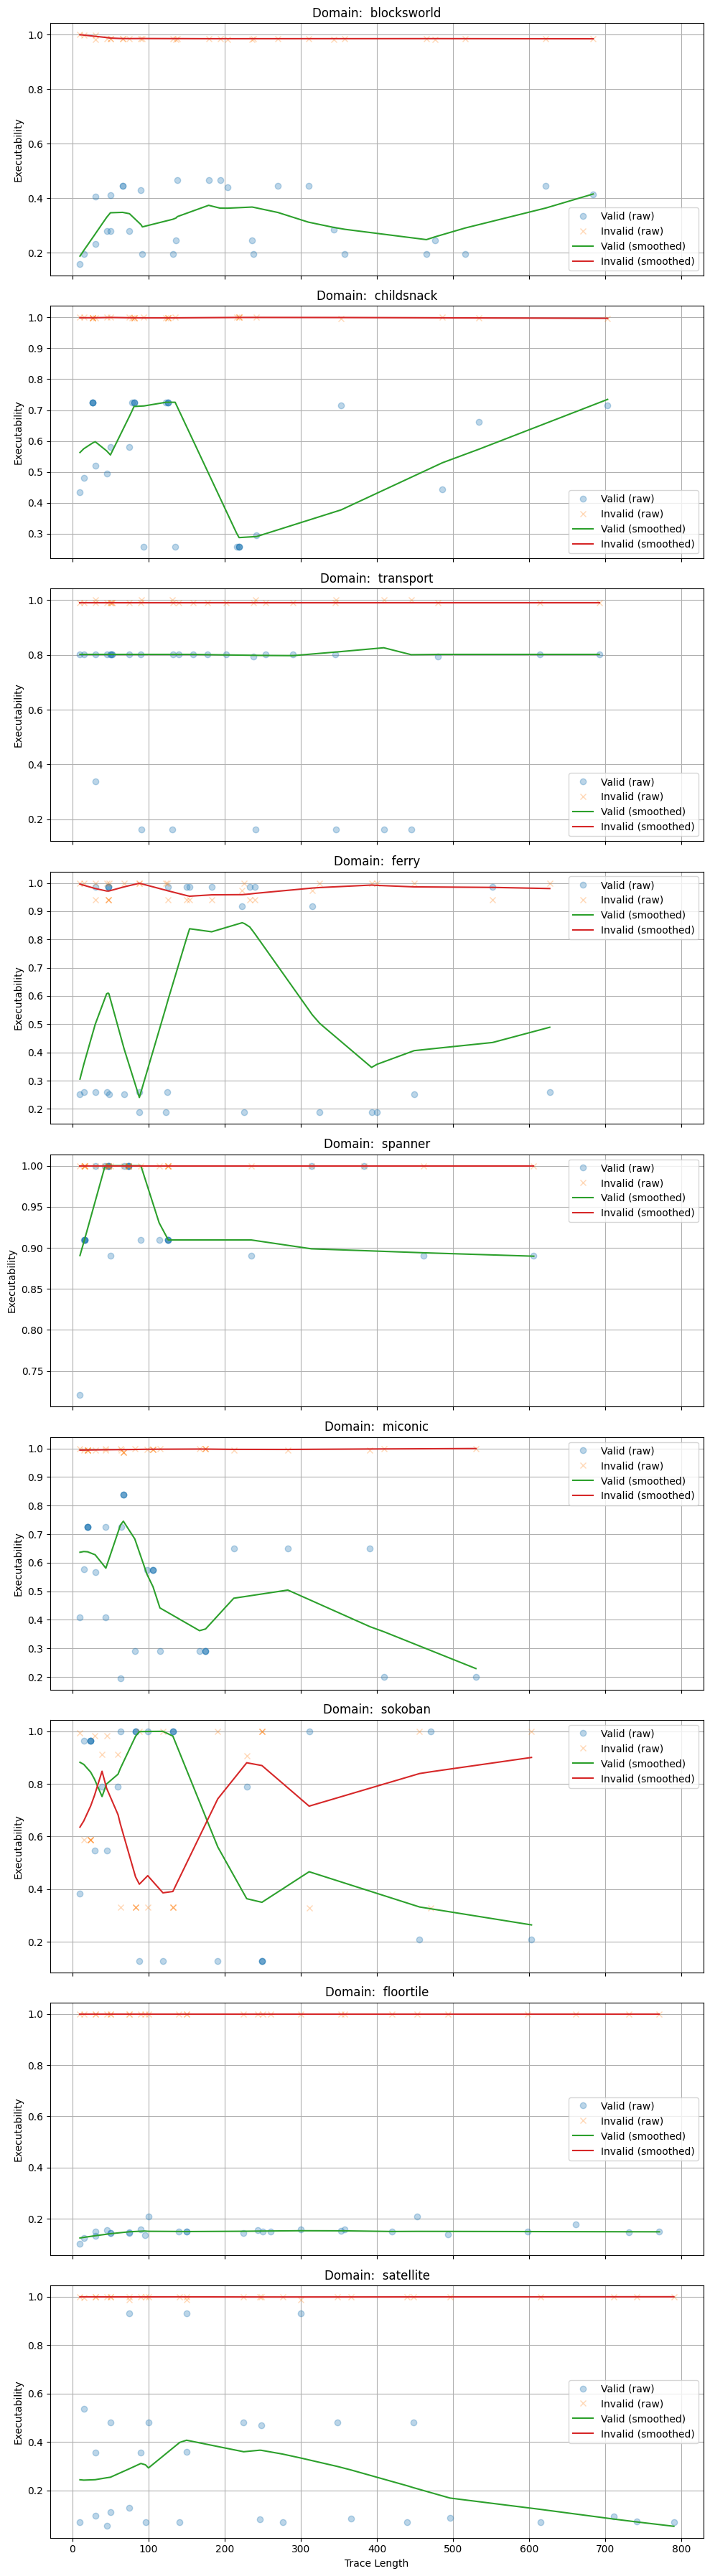

In [14]:


# Get unique domains
domains = df['Domain'].unique()
n_domains = len(domains)

# Create subplots
fig, axes = plt.subplots(n_domains, 1, figsize=(10, 4 * n_domains), sharex=True)

# If only one domain, make axes iterable
if n_domains == 1:
    axes = [axes]

# Plot smoothed curves per domain
for ax, domain in zip(axes, domains):
    domain_df = df[df['Domain'] == domain].sort_values(by='len')

    # Skip if not enough data points
    if len(domain_df) < 3:
        ax.set_title(f"{domain} (too few points)")
        continue

    # Smooth
    valid_smooth = lowess(domain_df['valid_exe'], domain_df['len'], frac=0.4)
    invalid_smooth = lowess(domain_df['invalid_exe'], domain_df['len'], frac=0.4)

    # Plot raw and smoothed
    ax.plot(domain_df['len'], domain_df['valid_exe'], 'o', alpha=0.3, label='Valid (raw)')
    ax.plot(domain_df['len'], domain_df['invalid_exe'], 'x', alpha=0.3, label='Invalid (raw)')
    ax.plot(valid_smooth[:, 0], valid_smooth[:, 1], label='Valid (smoothed)')
    ax.plot(invalid_smooth[:, 0], invalid_smooth[:, 1], label='Invalid (smoothed)')

    ax.set_title(f"Domain: {domain}")
    ax.set_ylabel("Executability")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Trace Length")
plt.tight_layout()
plt.show()


# Balaced exe

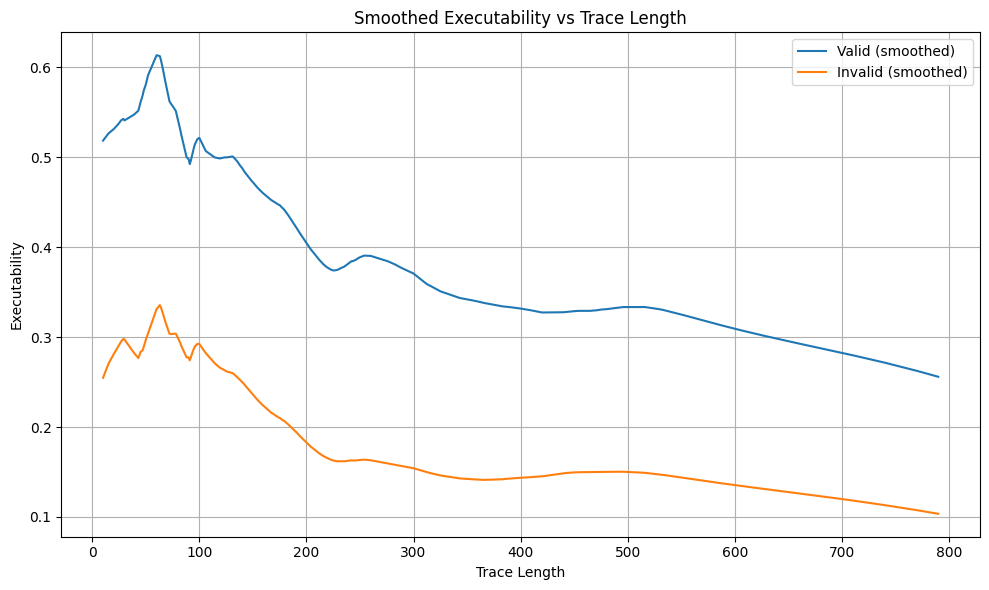

In [17]:


# Read and clean
df = pd.read_csv('balanced_exe.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='len')

# Apply LOWESS
valid_smoothed = lowess(df['valid_exe'], df['len'], frac=0.3)
invalid_smoothed = lowess(df['invalid_exe'], df['len'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(valid_smoothed[:, 0], valid_smoothed[:, 1], label='Valid (smoothed)')
plt.plot(invalid_smoothed[:, 0], invalid_smoothed[:, 1], label='Invalid (smoothed)')
plt.xlabel("Trace Length")
plt.ylabel("Executability")
plt.title("Smoothed Executability vs Trace Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


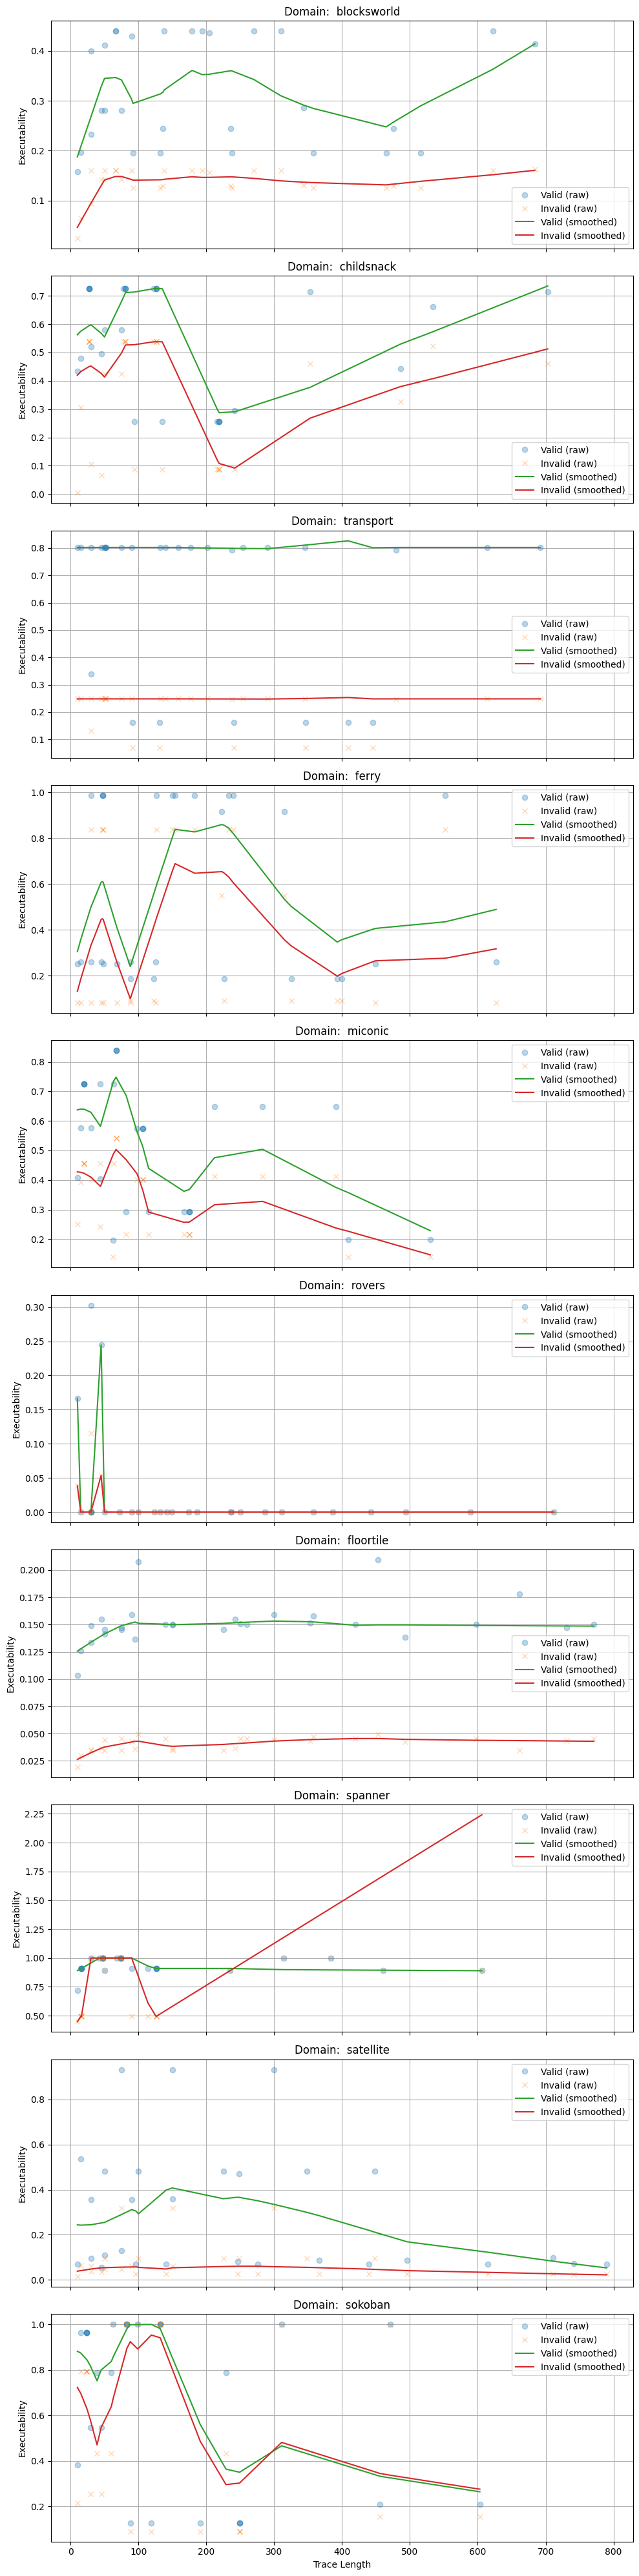

In [18]:


# Get unique domains
domains = df['Domain'].unique()
n_domains = len(domains)

# Create subplots
fig, axes = plt.subplots(n_domains, 1, figsize=(10, 4 * n_domains), sharex=True)

# If only one domain, make axes iterable
if n_domains == 1:
    axes = [axes]

# Plot smoothed curves per domain
for ax, domain in zip(axes, domains):
    domain_df = df[df['Domain'] == domain].sort_values(by='len')

    # Skip if not enough data points
    if len(domain_df) < 3:
        ax.set_title(f"{domain} (too few points)")
        continue

    # Smooth
    valid_smooth = lowess(domain_df['valid_exe'], domain_df['len'], frac=0.4)
    invalid_smooth = lowess(domain_df['invalid_exe'], domain_df['len'], frac=0.4)

    # Plot raw and smoothed
    ax.plot(domain_df['len'], domain_df['valid_exe'], 'o', alpha=0.3, label='Valid (raw)')
    ax.plot(domain_df['len'], domain_df['invalid_exe'], 'x', alpha=0.3, label='Invalid (raw)')
    ax.plot(valid_smooth[:, 0], valid_smooth[:, 1], label='Valid (smoothed)')
    ax.plot(invalid_smooth[:, 0], invalid_smooth[:, 1], label='Invalid (smoothed)')

    ax.set_title(f"Domain: {domain}")
    ax.set_ylabel("Executability")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Trace Length")
plt.tight_layout()
plt.show()


# Cross Exe

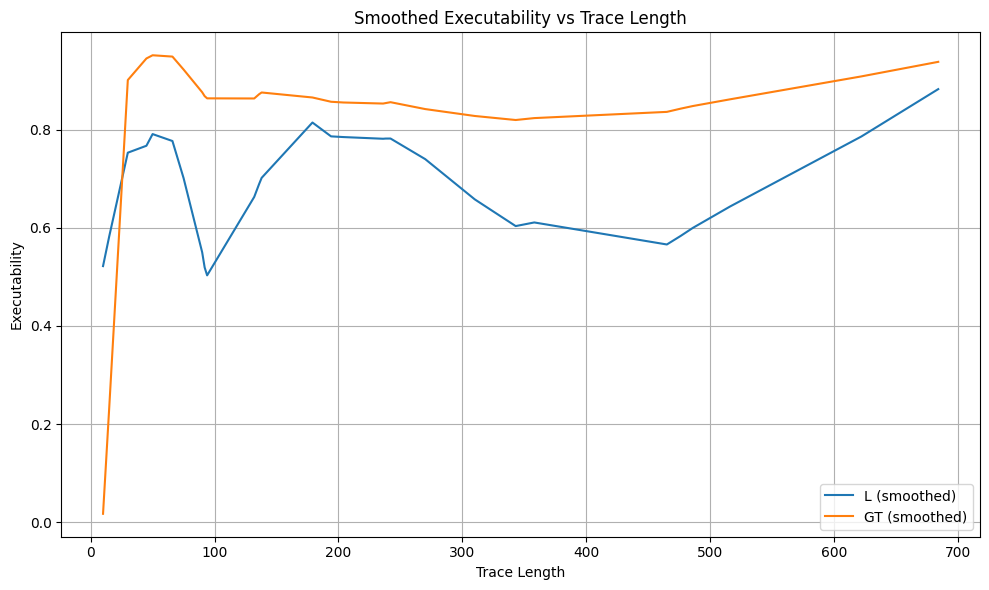

In [27]:
# Read and clean
df = pd.read_csv('cross_exe.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='len')

# Apply LOWESS
l_smoothed = lowess(df['l_exe'], df['len'], frac=0.3)
gt_smoothed = lowess(df['gt_exe'], df['len'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(l_smoothed[:, 0], l_smoothed[:, 1], label='L (smoothed)')
plt.plot(gt_smoothed[:, 0], gt_smoothed[:, 1], label='GT (smoothed)')
plt.xlabel("Trace Length")
plt.ylabel("Executability")
plt.title("Smoothed Executability vs Trace Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

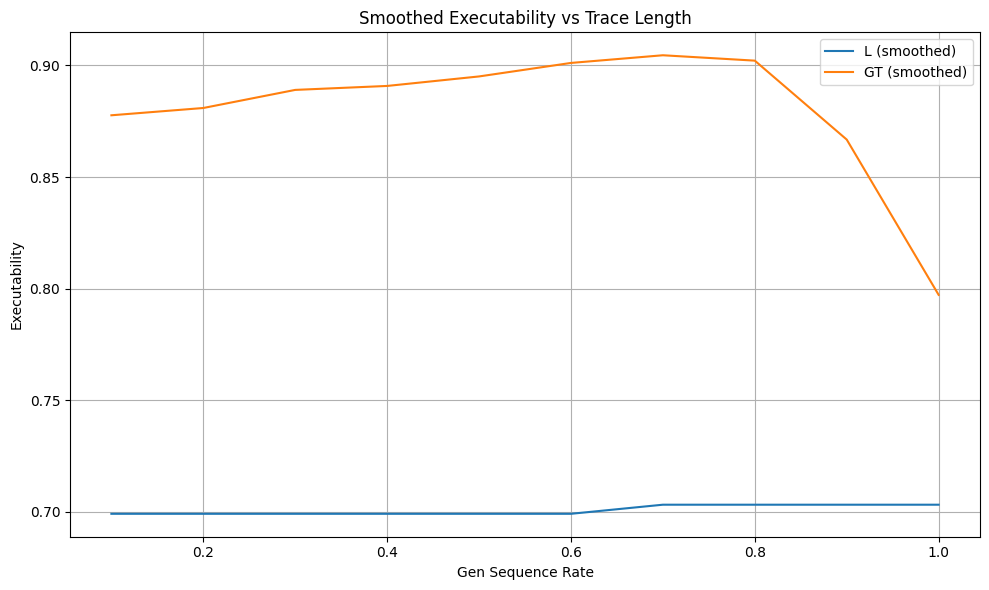

In [26]:
# Read and clean
df = pd.read_csv('cross_exe.csv')
df.columns = df.columns.str.strip()
df = df.sort_values(by='gen_seq_rate')

# Apply LOWESS
l_smoothed = lowess(df['l_exe'], df['gen_seq_rate'], frac=0.3)
gt_smoothed = lowess(df['gt_exe'], df['gen_seq_rate'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(l_smoothed[:, 0], l_smoothed[:, 1], label='L (smoothed)')
plt.plot(gt_smoothed[:, 0], gt_smoothed[:, 1], label='GT (smoothed)')
plt.xlabel("Gen Sequence Rate")
plt.ylabel("Executability")
plt.title("Smoothed Executability vs Trace Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()